# Data Cleaning


In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd

In [9]:
#importing the loan csv file here for Data Cleaning.
loan= pd.read_csv(r"C:\Users\Shiksha\Desktop\Data Science Assignment\loan.csv" , encoding = "ISO-8859-1")
loan.shape

(39717, 111)

In [10]:
# Check the Sum of Null values in the Column of imported CSV.
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [11]:
# Check the Percentage of NA values in each columns.
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [12]:
# dropping the NA columns.
loan=loan.dropna(axis=1, how='all')

In [13]:
#Get the Shape after dropping Coulmns having all rows as NA.
loan.shape
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [14]:
# Drop the Columns which have only one unique value.
for col in loan:
    if len(loan[col].unique()) == 1:
        loan.drop(col,inplace=True,axis=1)

In [15]:
# Percentage of NULL values in each columns.
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths                 0.00
mths_since_last_delinq      

In [16]:
#Drop those columns which have more than 30% percentage of Null value.
loan = loan.drop(['desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d'], axis = 1)
loan.shape

(39717, 47)

In [17]:
# Drop rows with the Duplicate rows.
loan = loan.drop_duplicates(subset = None, keep = "first")

In [18]:
#Get the Shape after dropping rows with the Duplicate rows.
loan.shape

(39717, 47)

In [19]:
# Convert int_rate from Character type to Float Type
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [20]:
# Extract Number value from the string from field: emp_length and convert to Numeric
import re
loan = loan[~loan['emp_length'].isnull()]
loan.emp_length.fillna('0',inplace=True)
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65,162.87,B,B2,...,0.00,0.00,0.0000,Jan-15,171.62,May-16,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27,59.83,C,C4,...,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96,84.33,C,C5,...,0.00,0.00,0.0000,Jun-14,649.91,May-16,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49,339.31,C,C1,...,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,0.0,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69,67.79,B,B5,...,0.00,0.00,0.0000,May-16,67.79,May-16,0.0,0.0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90,156.46,A,A4,...,0.00,0.00,0.0000,Jan-15,161.03,Jan-16,0.0,0.0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96,170.08,C,C5,...,0.00,0.00,0.0000,May-16,1313.76,May-16,0.0,0.0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64,109.43,E,E1,...,0.00,0.00,0.0000,Jan-15,111.34,Dec-14,0.0,0.0,0.0,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28,152.39,F,F2,...,0.00,189.06,2.0900,Apr-12,152.39,Aug-12,0.0,0.0,0.0,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69,121.45,B,B5,...,0.00,269.29,2.5200,Nov-12,121.45,Mar-13,0.0,0.0,0.0,0.0


In [21]:
#Convert fields to Numeric for Analysis
num = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti','emp_length']
loan[num] = loan[num].apply(pd.to_numeric)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65,162.87,B,B2,...,0.00,0.00,0.0000,Jan-15,171.62,May-16,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27,59.83,C,C4,...,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96,84.33,C,C5,...,0.00,0.00,0.0000,Jun-14,649.91,May-16,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49,339.31,C,C1,...,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,0.0,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69,67.79,B,B5,...,0.00,0.00,0.0000,May-16,67.79,May-16,0.0,0.0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90,156.46,A,A4,...,0.00,0.00,0.0000,Jan-15,161.03,Jan-16,0.0,0.0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96,170.08,C,C5,...,0.00,0.00,0.0000,May-16,1313.76,May-16,0.0,0.0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64,109.43,E,E1,...,0.00,0.00,0.0000,Jan-15,111.34,Dec-14,0.0,0.0,0.0,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28,152.39,F,F2,...,0.00,189.06,2.0900,Apr-12,152.39,Aug-12,0.0,0.0,0.0,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69,121.45,B,B5,...,0.00,269.29,2.5200,Nov-12,121.45,Mar-13,0.0,0.0,0.0,0.0


In [22]:
#Drop Columns Not required for analysis and create dataframe with the cleaned Data.
irrelevant = ["member_id","url","zip_code","id"]
loan.drop(labels = irrelevant, axis =1, inplace=True)

# Function to plot Graphs:

In [23]:

import matplotlib.pyplot as plt
# seaborn : advanced visualization
import seaborn as sns
#Check the version of seaborn
print('seaborn version\t:',sns.__version__)

#graphs function will plot the graphs based on the parameters.
#var: continuos or categorical
#Continuos(0): Distribution, Violin & Boxplot will be plotted.
#Categorical(1): Countplot will be plotted.

def graphs(df,column,var,hue =None):

    sns.set(style="whitegrid")
    
    if var == 0:
        fig, axis=plt.subplots(nrows =1,ncols=3,figsize=(20,7))
        axis[0].set_title("Violin Plot")
        sns.violinplot(data =df, x=column,ax=axis[0], inner="quartile")
        axis[1].set_title("Distribution Plot")
        sns.distplot(df[column],ax=axis[1])
        axis[2].set_title("Box Plot")
        sns.boxplot(data =df, x=column,ax=axis[2],orient='v')
        
    if var == 1:
        tempSeries = pd.Series(data = hue)
        fig, axis = plt.subplots()
        width = len(df[column].unique()) + 6 + 4*len(tempSeries.unique())
        fig.set_size_inches(width , 7)
        axis = sns.countplot(data = df, x= column, order=df[column].value_counts().index,hue = hue) 
        if len(tempSeries.unique()) > 0:
            for p in axis.patches:
                axis.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in axis.patches:
                axis.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del tempSeries
    else:
        exit
        
    plt.show()

seaborn version	: 0.9.0


# Data Analysis on Cleaned Loan Data

## Univariate Analysis

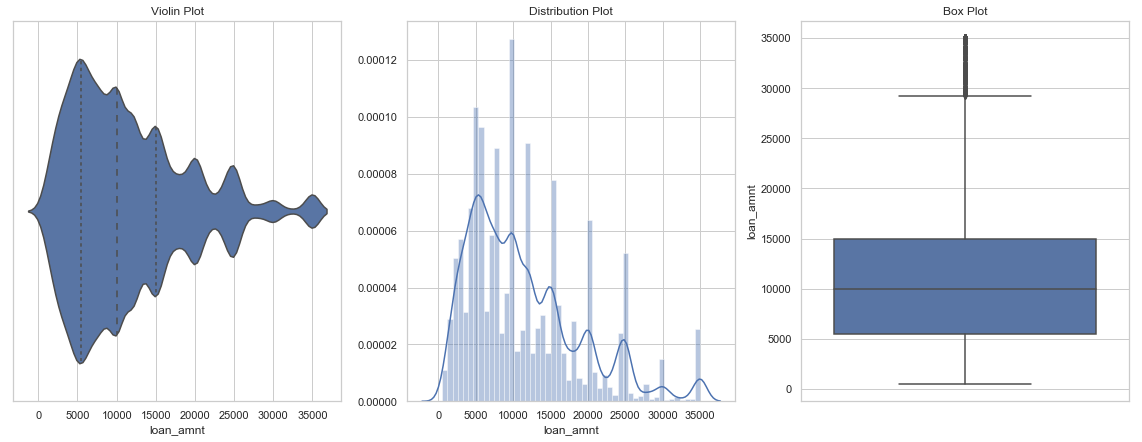

In [24]:
# Draw Univariate curve for Loan Amount(field loan_amnt)
graphs(df=loan,column='loan_amnt',var=0)

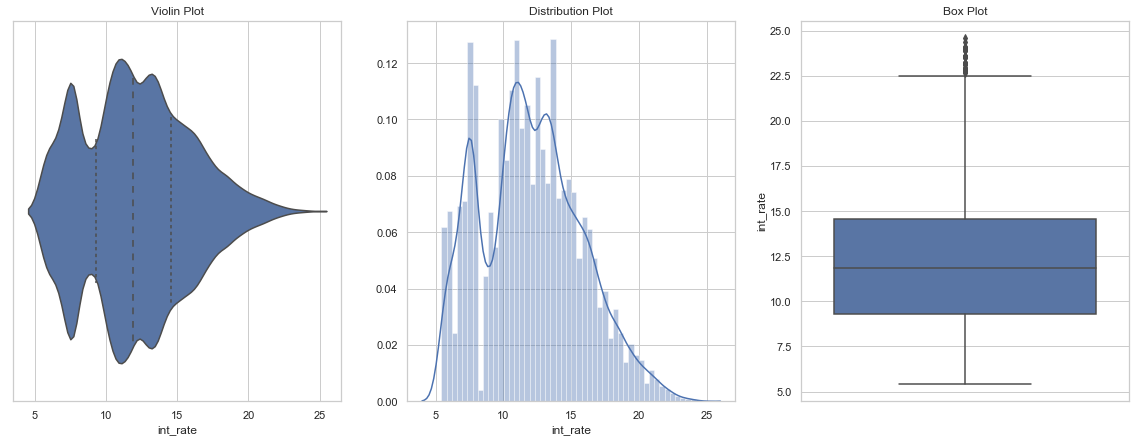

In [25]:
# Draw Univariate curve for Interest Rate (field int_rate)
graphs(df=loan,column='int_rate',var=0)

In [26]:
# Describe the annual_inc field
loan["annual_inc"].describe()

count    3.864200e+04
mean     6.960828e+04
std      6.425320e+04
min      4.000000e+03
25%      4.140000e+04
50%      6.000000e+04
75%      8.319999e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [27]:
# Removing Outliers (values from 99 to 100%)
q = loan["annual_inc"].quantile(0.995)
loan = loan[loan["annual_inc"] < q]
loan["annual_inc"].describe()

count     38422.000000
mean      66977.958050
std       37415.970687
min        4000.000000
25%       41004.000000
50%       60000.000000
75%       82404.000000
max      294000.000000
Name: annual_inc, dtype: float64

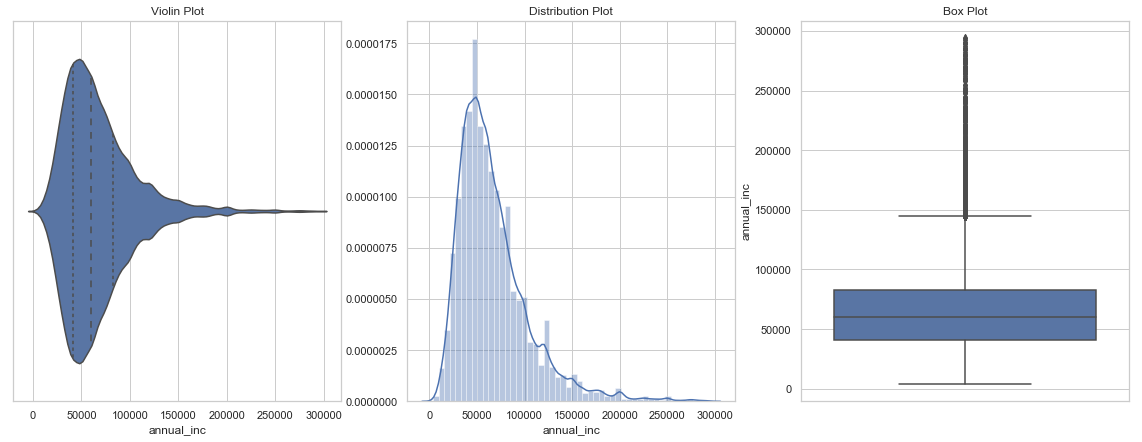

In [28]:
## Draw Univariate curve for field annual_inc
graphs(df=loan,column='annual_inc',var=0)

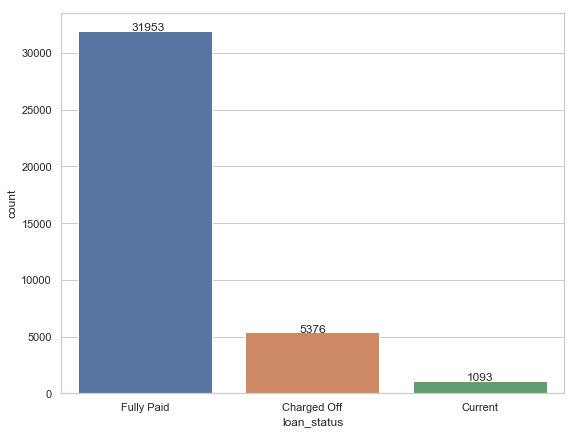

In [29]:
#Loan Status: Fully Paid, Charged Off, Current
graphs(df=loan,column='loan_status',var=1)

In [30]:
#Purpose of Loan in percentage
(loan.purpose.value_counts()*100)/len(loan)

debt_consolidation    47.269793
credit_card           12.961324
other                  9.931810
home_improvement       7.355161
major_purchase         5.476029
small_business         4.609338
car                    3.891000
wedding                2.412680
medical                1.728177
moving                 1.441882
house                  0.942169
vacation               0.916142
educational            0.822445
renewable_energy       0.242049
Name: purpose, dtype: float64

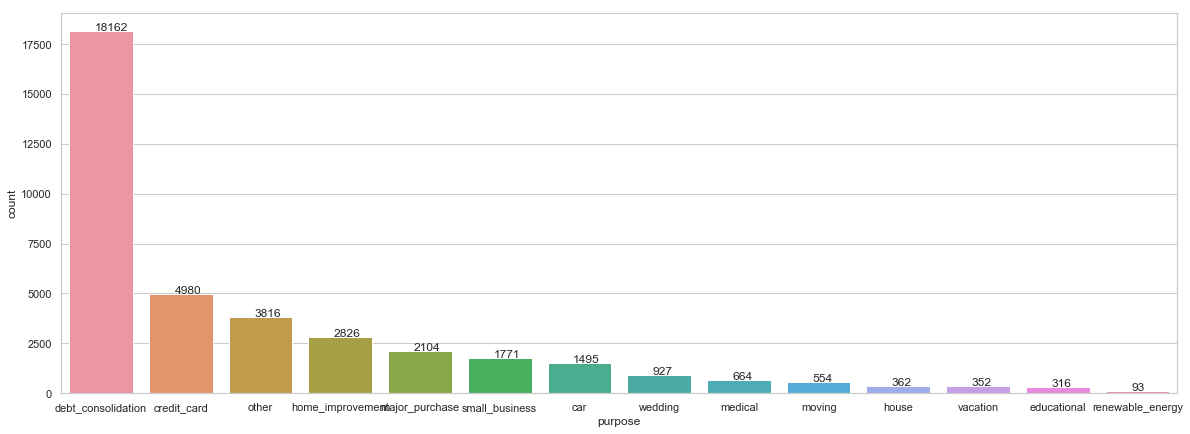

In [31]:
#Count of Purpose of Loan
graphs(df=loan,column='purpose',var=1)

In [32]:
#extract month and year
loan['issue_month'],loan['issue_year'] = loan['issue_d'].str.split('-', 1).str
months = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
loan['issue_month'] = pd.Categorical(loan['issue_month'],categories=months, ordered=True)
loan['issue_year']= '20'+loan['issue_year']
loan[['issue_d','issue_month','issue_year']].head()

,issue_d,issue_month,issue_year
0,Dec-11,Dec,2011
1,Dec-11,Dec,2011
2,Dec-11,Dec,2011
3,Dec-11,Dec,2011
4,Dec-11,Dec,2011


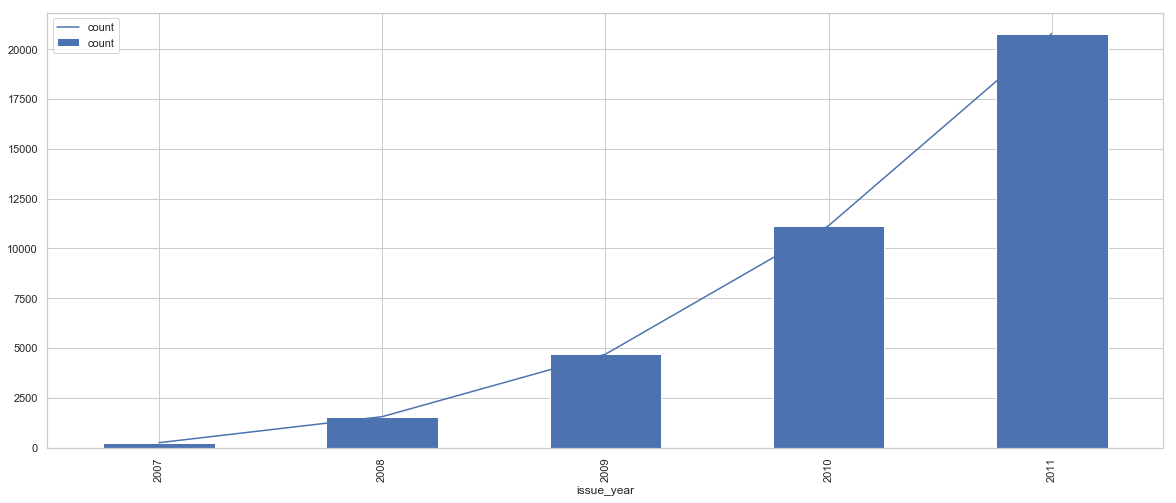

In [33]:
# loan based on year
year_wise =loan.groupby(by= [loan.issue_year])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)

ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

In [34]:
#loan based on ownership
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [35]:
#Remove Home Ownerships define as:'OTHER', 'NONE', 'ANY'
rem = ['OTHER', 'NONE', 'ANY']
loan.drop(loan[loan['home_ownership'].isin(rem)].index,inplace=True)
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

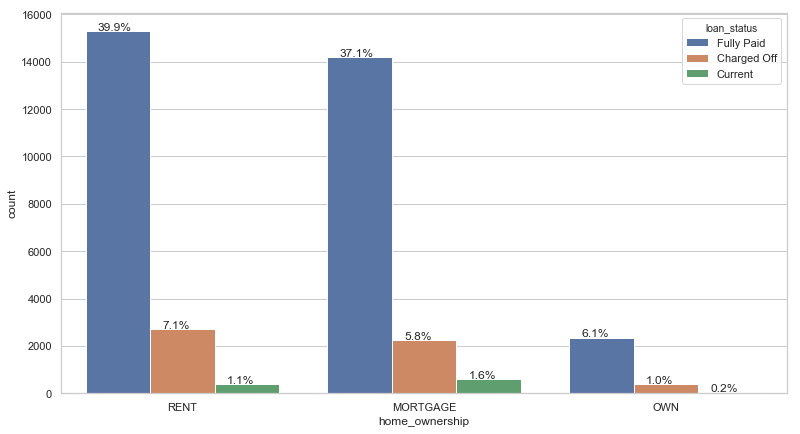

In [36]:
#Draw the curve for Home Ownerships other than defined as:'OTHER', 'NONE', 'ANY'
graphs(df=loan,column='home_ownership',var=1,hue='loan_status')

 From the above plot, we can infer that about 40% of applicants are living in rented home whereas 36% applicants have mortgaged their home.

## Bivariate/Multivariate Analysis

In order to find out what parameters are impacting the most on Loan Status i.e., if an applicant will successfully complete the loan term or will charge off(default).

We can do our analysis based on a probability:

Probability= NumberofApplicants who charged off/Total No.ofApplicants
 

In [37]:
#Function to define Probability_Charged Off
def table(df,col):
    
    table = pd.crosstab(df[col], df['loan_status'],margins=True)
    table['Probability_Charged Off'] = round((table['Charged Off']/table['All']),3)
    table = table[0:-1]
    return table

In [38]:
# define function to plot bivariate plot
def bivariate_prob(df,col,stacked= True):
    
    plottab = table(df,col)
    
    linePlot = plottab[['Probability_Charged Off']]      
    barPlot =  plottab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
purpose,,,,,
car,154,49,1290,1493,0.103
credit_card,507,101,4361,4969,0.102
debt_consolidation,2665,566,14890,18121,0.147
educational,52,0,261,313,0.166
home_improvement,323,92,2406,2821,0.114
house,59,14,288,361,0.163
major_purchase,209,35,1853,2097,0.100
medical,101,12,548,661,0.153
moving,82,7,464,553,0.148


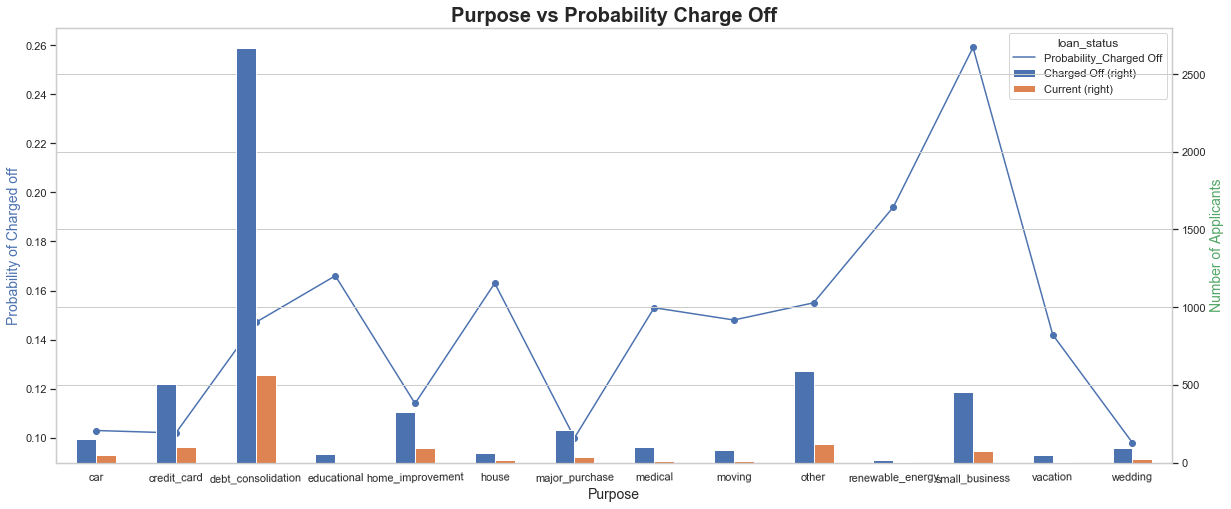

In [39]:
#Plotting the purpose of loan vs probability

purpose = table(loan,'purpose')
display(purpose)

bivariate_prob(df =loan,col ='purpose',stacked=False)

In [40]:
#Create a bine of int_rate_range
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan['int_rate_range'] = pd.cut(loan['int_rate'], bins, labels=slot)

Above plot makes it visually clear that most defaulters take a loan for the purpose of a small business.

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
int_rate_range,,,,,
0-7.5,231,6,4863,7415,0.031
7.5-10,528,64,6138,8892,0.059
10-12.5,1172,254,7917,5100,0.230
12.5-15,1411,250,7231,9343,0.151
15 and above,1729,419,5267,6730,0.257


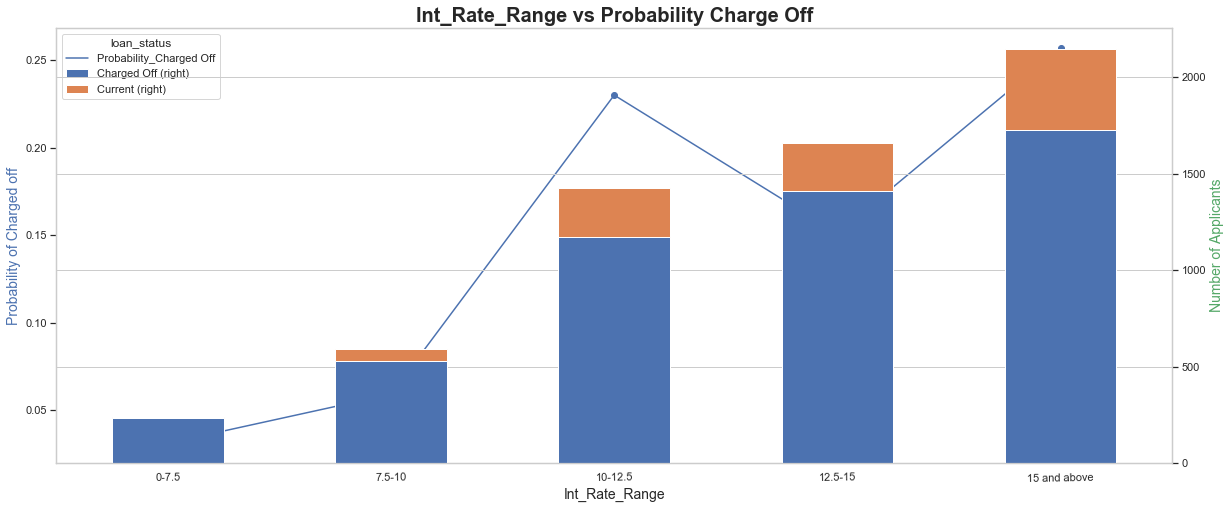

In [41]:
#interest range vs probability of default

int_rate_range = table(loan,'int_rate_range')
display(int_rate_range)

bivariate_prob(df =loan,col ='int_rate_range')

As we can see in the above plot, the probability of defaulting on the loan is maximum among 10-12.5% range and 15% and above range
